### BASIC IMPORTS AND CLEANING

In [53]:
#regular imports
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
#read the data
df = pd.read_csv('spam.csv')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [55]:
# basic cleaning
columns_to_drop = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']
df = df.drop(columns=columns_to_drop)
df = df.rename(columns={'v1': 'label', 'v2': 'text'})

In [56]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [57]:
# library to get the stopwords
from nltk.corpus import stopwords
sw = stopwords.words('english')

### WITH PREPROCESSING

In [10]:
def apply_preprocessing(sentence : str)->str:
    sentence = sentence.lower()
    sentence = sentence.replace('\n', ' ')
    sentence = sentence.replace('\r', ' ')
    sentence = sentence.replace('\t', ' ')
    sentence = sentence.replace('  ', ' ')
    #remove all numbers
    sentence = ''.join([i for i in sentence if not i.isdigit()])
    #remove all punctuation
    sentence = ''.join([i for i in sentence if i.isalpha() or i == ' '])
    # remove words with length less than 3
    sentence = ' '.join([word for word in sentence.split() if len(word) > 2])
    #remove all stopwords
    sentence = ' '.join([word for word in sentence.split() if word not in sw])
    return sentence

In [58]:
#apply the preprocessing
df_with_preprocessing = df.copy()
df_with_preprocessing['text'] = df_with_preprocessing['text'].apply(apply_preprocessing)

In [59]:
df_with_preprocessing.head()

,label,text
0,ham,jurong point crazy available bugis great world...
1,ham,lar joking wif oni
2,spam,free entry wkly comp win cup final tkts may te...
3,ham,dun say early hor already say
4,ham,nah dont think goes usf lives around though


In [60]:
# label encoding
df_with_preprocessing['label'].replace({
    'spam' : 1,
    'ham' : 0,
    } , inplace=True)

In [61]:
df_with_preprocessing.head()

,label,text
0,0,jurong point crazy available bugis great world...
1,0,lar joking wif oni
2,1,free entry wkly comp win cup final tkts may te...
3,0,dun say early hor already say
4,0,nah dont think goes usf lives around though


In [62]:
# model necessary imports
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [64]:
# convert text to numbers
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_with_preprocessing['text'])
y = df_with_preprocessing['label']


In [65]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
# train the model
NB_model = MultinomialNB()
NB_model.fit(X_train, y_train)

MultinomialNB()

In [67]:
# check the accuracy
NB_model.score(X_test, y_test)

0.9650224215246637

In [68]:
# predict
y_pred = NB_model.predict(X_test)

In [69]:
accuracy_score(y_test, y_pred)

0.9650224215246637

Text(50.722222222222214, 0.5, 'Actual')

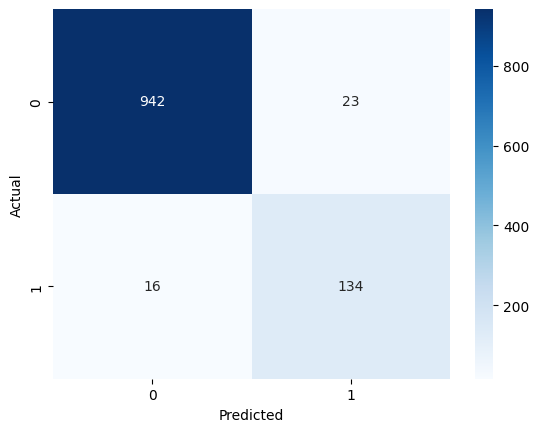

In [70]:
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# rename axes
plt.xlabel('Predicted')
plt.ylabel('Actual')

### WITHOUT PREPROCESSING

In [71]:
df_without_preprocessing = pd.read_csv('spam.csv')

In [72]:
df_without_preprocessing = df_without_preprocessing.drop(columns=columns_to_drop)

In [73]:
df_without_preprocessing.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [74]:
df_without_preprocessing.rename(columns={'v1': 'label', 'v2': 'text'}, inplace=True)

In [75]:
df_without_preprocessing['label'].replace({
    'spam' : 1,
    'ham' : 0,
    } , inplace=True)

In [76]:
df_without_preprocessing.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [77]:
X = vectorizer.fit_transform(df_without_preprocessing['text'])
y = df_without_preprocessing['label']


In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
NB_Model_2 = MultinomialNB()
NB_Model_2.fit(X_train, y_train)

MultinomialNB()

In [80]:
NB_Model_2.score(X_test, y_test)

0.97847533632287

In [81]:
y_pred = NB_Model_2.predict(X_test)

In [82]:
accuracy_score(y_test, y_pred)

0.97847533632287

Text(50.722222222222214, 0.5, 'Actual')

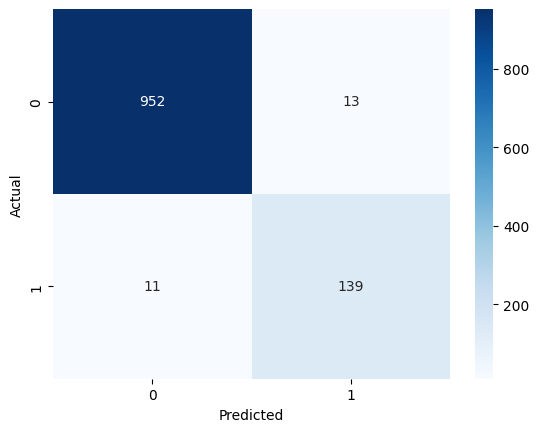

In [83]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# rename axes
plt.xlabel('Predicted')
plt.ylabel('Actual')